In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset .csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

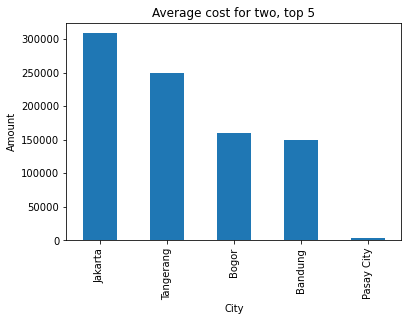

In [13]:
#group by city and caluclate average cost
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending = False).head().plot(kind = "bar")
plt.title("Average cost for two, top 5")
plt.xlabel("City")
plt.ylabel("Amount")

plt.show()

In [17]:
#cuisines and total no of votes
data = df.groupby("Cuisines")["Votes"].sum().reset_index()

In [19]:
data[data["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


In [20]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

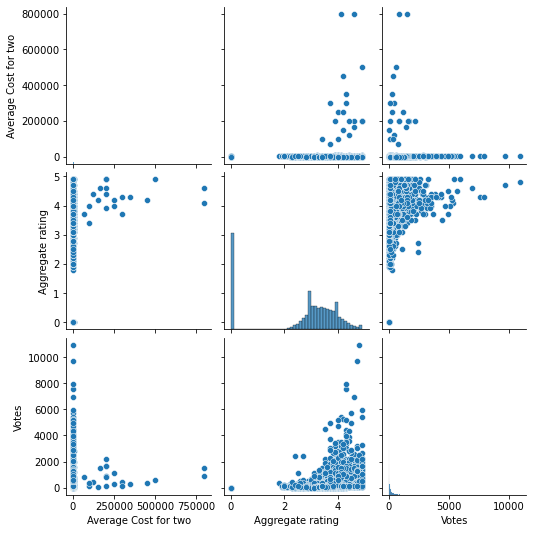

In [21]:
sns.pairplot(df[["Average Cost for two","Aggregate rating","Votes"]])

In [22]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

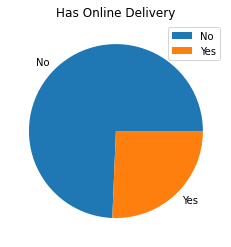

In [24]:
df["Has Online delivery"].value_counts().plot(kind = "pie")
plt.title("Has Online Delivery")
plt.ylabel("")
plt.legend()
plt.show()

In [35]:
df[["Aggregate rating","Rating text"]].sort_values(by= "Aggregate rating", ascending = True).head(2300)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
8716,2.4,Poor
4953,2.4,Poor
1771,2.4,Poor
8467,2.4,Poor


In [41]:
df = df[df["Rating text"] != "Not rated"]

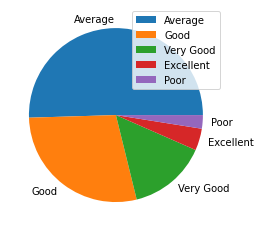

In [43]:
df ["Rating text"].value_counts().plot(kind = "pie")
plt.title = ("Rating Averages")
plt.ylabel("")
plt.legend()

In [16]:
#modeling

In [44]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [45]:
x = df[["Average Cost for two","Has Table booking","Has Online delivery","Price range"]]

In [46]:
y = df[["Aggregate rating"]]

In [48]:
x["Price range"].value_counts()

1    2744
2    2711
3    1373
4     575
Name: Price range, dtype: int64

In [49]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [50]:
x["Has Table booking"]= labelencoder.fit_transform(x["Has Table booking"])

/var/folders/kq/p_tbhhcd7qndh2yqcz8jw27r0000gn/T/ipykernel_75196/154979745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Table booking"]= labelencoder.fit_transform(x["Has Table booking"])


In [51]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [ ]:
#1 is yes for has table booking and for has online delivery
# 0 is no

In [52]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [53]:
x["Has Online delivery"] = labelencoder.fit_transform(x["Has Online delivery"])

/var/folders/kq/p_tbhhcd7qndh2yqcz8jw27r0000gn/T/ipykernel_75196/2857882153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Online delivery"] = labelencoder.fit_transform(x["Has Online delivery"])


In [54]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [55]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
x = scaler.fit_transform(x)

In [58]:
x

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
x_train ,x_test, y_train ,y_test = train_test_split(x,y,test_size= 0.2)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np



In [71]:
def modelresults(predictions):
      print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
      print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
predictionsfromlr = lr.predict(x_test)

In [72]:
modelresults(predictionsfromlr)

Mean absolute error on model is 0.3899518173934335
Root mean squared error on model is 0.49620130274722457


In [73]:
predictionsfromlr

array([[3.49240674],
       [3.49283415],
       [3.49294812],
       ...,
       [3.22646016],
       [3.22663112],
       [3.2262892 ]])

In [74]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [75]:
svrmodel = SVR()

In [93]:
param_gridsvr = {"C" : [0.1,0.5],"kernel" : ["linear","poly"],"degree": [2]}

In [94]:
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(x_train,y_train)

/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was pas

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [96]:
predgridsvr = gridsvr.predict(x_test)

In [97]:
modelresults(predgridsvr)

Mean absolute error on model is 0.3874810300713844
Root mean squared error on model is 0.49776259337506146


In [98]:
from sklearn.tree import DecisionTreeRegressor


In [99]:
param_grid = {
      "max_depth" : [10,30],
      "min_samples_leaf" : [1,2],
      "min_samples_split" : [2,5]
}

In [100]:
treemodel = DecisionTreeRegressor()

In [101]:
grid_tree = GridSearchCV(estimator= treemodel,param_grid= param_grid)

In [102]:
grid_tree.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [104]:
treepredictions = grid_tree.predict(x_test)

In [105]:
modelresults(treepredictions)

Mean absolute error on model is 0.35845771147947114
Root mean squared error on model is 0.45689688768857273


In [106]:
from sklearn.ensemble import RandomForestRegressor


In [107]:
rfrmodel = RandomForestRegressor()

In [108]:
param_gridrfr = {"max_depth" : [5,15], "n_estimators": [2,5,10]}

In [109]:
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)

In [110]:
gridrfr.fit(x_train,y_train)

/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/s

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [111]:
randomforestpredictions = gridrfr.predict(x_test)

In [112]:
modelresults(randomforestpredictions)

Mean absolute error on model is 0.35554976693133267
Root mean squared error on model is 0.4543297448214975


In [113]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [114]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [147]:
from sklearn.neighbors import KNeighborsRegressor
knm = KNeighborsRegressor()   
knm_param_grid = {"n_neighbors" : [ 9,11,14,15,16]}
knm_grid_search = GridSearchCV(knm,knm_param_grid)

In [148]:
knm_grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 11, 14, 15, 16]})

In [149]:
knmpreds = knm_grid_search.predict(x_test)

In [150]:
modelresults(knmpreds)

Mean absolute error on model is 0.37081363943281564
Root mean squared error on model is 0.4701385297663131


In [151]:
knm_grid_search.best_params_

{'n_neighbors': 16}

In [152]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {"n_estimators" : [50,100,200],
                  "learning_rate" : [0.1,0.5,1] }
ada_grid_search = GridSearchCV(ada,ada_param_grid)


In [153]:
ada_grid_search.fit(x_train,y_train)

/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/hanugnajarugumalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was pas

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [154]:
adapreds = ada_grid_search.predict(x_test)

In [155]:
modelresults(adapreds)

Mean absolute error on model is 0.3665170330082925
Root mean squared error on model is 0.4649169789541633


In [156]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [157]:
import joblib
joblib.dump(gridrfr,"mlmodel.pkl")

['mlmodel.pkl']

In [158]:
scaler

StandardScaler()

In [159]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']